# CBS3006
## Team Members

- ### Harsh Pareek
- ### Savyasachi Hemant Shriram
- ### Ana Singh

# Sentimental Analysis: Comment Hate Speech

### Dataset
The comments in this dataset come from an archive of the Civil Comments platform, a commenting plugin for independent news sites. These public comments were created from 2015 - 2017 and appeared on approximately 50 English-language news sites across the world. When Civil Comments shut down in 2017, they chose to make the public comments available in a lasting open archive to enable future research. The original data, published on figshare, includes the public comment text, some associated metadata such as article IDs, timestamps and commenter-generated ` civility ` labels, but does not include user ids. Jigsaw extended this dataset by adding additional labels for toxicity, identity mentions, as well as covert offensiveness. This data set is an exact replica of the data released for the Jigsaw Unintended Bias in Toxicity Classification Kaggle challenge. This dataset is released under CC0, as is the underlying comment text.

# Importing Initial Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

#### Matplotlib Configuration

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Importing Dataset

Dataset has been downloaded from the kaggle website.

In [3]:
data = pd.read_csv("./data.csv")

In [4]:
print("----- Printing Dataset Info -----")
data.info()

----- Printing Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15

In [5]:
print("----- Printing Dataset Shape -----")
data.shape

----- Printing Dataset Shape -----


(1999516, 46)

 As we can see, there are total `1999516` examples and each example has `46` attributes

In [6]:
print("----- printing dataset examples (first four rows) -----")
data.head(4)

----- printing dataset examples (first four rows) -----


,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76


#### As we look at the dataset, each row consists of 46 attributes. Many of these attributes are not going to affect our model in anyway and we will be removing them in our feature selection process further. Now let's look at the some of the important features in this dataset.
#### First of all, attribute "comment_text" is the one that contains the plain text of each comment. this is going to be the only feature for our model. (X)
#### there are several classes for each comment such as toxicity, severe_toxicity, obscene, sexual_explicit, identity_attack, insult, threat. These are the only features we will be caring about.

# Clearning Dataset

In [7]:
cleaned_data = data.dropna()

# Feature Selection

In [8]:
columns = ["comment_text", "split", "toxicity", "sever_toxicity", "obscene", "sexual_explicit", "identity_attack", "insult", "threat"]

In [9]:
extracted_data = cleaned_data[data.columns[data.columns.isin(columns)]]

In [10]:
extracted_data.shape

(259716, 8)

#### We are reduced to only 9 of required attributes here

# Train and Test Split
this dataset has a special attribute that helps us classify the dataset into test and train split. we don't need to use the sklearn function to split.

In [11]:
data_train = extracted_data[extracted_data.split == "train"]
data_train = data_train.sample(n=50000,random_state=1283)

In [12]:
data_train.shape

(50000, 8)

In [13]:
data_train.head(5)

,comment_text,split,toxicity,obscene,sexual_explicit,identity_attack,insult,threat
1821138,How about being black? Are you fine with that?...,train,0.7,0.1,0.0,0.7,0.2,0.0
1287992,That you volunteering is it?,train,0.0,0.0,0.0,0.0,0.0,0.0
1652481,Identify my lie.,train,0.0,0.0,0.0,0.0,0.0,0.0
1036757,He's not picking a fight. He's leveraging his ...,train,0.0,0.0,0.0,0.0,0.0,0.0
1458926,"RangerMC, So you think that the left, which is...",train,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data_test = extracted_data[extracted_data.split == "test"]
data_test.shape

(24629, 8)

# Bag of Words Model

#### Bag of words is a Natural Language Processing technique of text modelling. Through this blog, we will learn more about why Bag of Words is used, we will understand the concept with the help of an example, learn more about it’s implementation in Python, and more.

In [15]:
import re
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve,auc
from tqdm.notebook import tqdm

### NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. We will use NLTK for our bag of words model implementation.

In [16]:
from nltk.corpus import stopwords
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/harshpareek/nltk_data...
[nltk_data]    |   Pa

True

In [17]:
def comments_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.
    return(" ".join(meaningful_words))

Now we will store the cleaned comment texts using the `comments_to_words` function in the `cleaned_comments[]` array.

In [18]:
cleaned_comments = []

In [19]:
num_reviews = data_train["comment_text"].size
num_reviews

50000

`tqdm` helps us track the number of processed comments

In [20]:
for i in tqdm(range(0,num_reviews)):
    cleaned_comments.append(comments_to_words(data_train.iloc[i,0]))

  0%|          | 0/50000 [00:00<?, ?it/s]

# CountVectorizer converts a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.



In [21]:
# let's look at the comment_text sample
cleaned_comments[3]

'picking fight leveraging position governor subtle obfuscated ways alaskans lose concerns comments disappear back work big brother listening'

### Count Vectorizer
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [22]:
# vectorizer
vectorizer = CountVectorizer(
    analyzer="word",
    tokenizer=None,
    stop_words=None,
    max_features=10000,
    preprocessor=None
)

In [23]:
# extract all the comments from the training dataset
train_comment_texts = cleaned_comments

In [24]:
# transforming the comments into word tokens
train_data_features = vectorizer.fit_transform(train_comment_texts)

In [25]:
# getting all the words that are extracted from the comment texts
vocab = vectorizer.get_feature_names_out()
print("size of vocabulary: %d" %(len(vocab)))

size of vocabulary: 10000


In [26]:
# converting the output of the vectorizer into array
train_data_features = train_data_features.toarray()

In [27]:
print("our train_features dataset has shape: ",train_data_features.shape)

our train_features dataset has shape:  (50000, 10000)


In [28]:
# Generating frequencies
dist = np.sum(train_data_features,axis=0)

# sample frequencies
total_count = 0
for tag,count in zip(vocab,dist):
    if total_count > 100:
        break
    print("%s -> %d" % (tag,count))
    total_count += 1

aa -> 44
ab -> 26
abandon -> 50
abandoned -> 75
abandoning -> 28
abandonment -> 19
abbott -> 15
abc -> 29
abhorrent -> 22
abide -> 39
abiding -> 82
abilities -> 24
ability -> 288
abject -> 19
able -> 704
abnormal -> 16
abolish -> 29
abolished -> 21
aboriginal -> 58
aboriginals -> 21
abort -> 33
aborted -> 30
abortion -> 882
abortions -> 237
abraham -> 59
abroad -> 28
absence -> 59
absent -> 37
absolute -> 164
absolutely -> 481
absolutist -> 15
absorb -> 22
absorbed -> 29
abstinence -> 16
abstract -> 22
absurd -> 118
abundance -> 20
abuse -> 622
abused -> 167
abuser -> 37
abusers -> 71
abuses -> 38
abusing -> 57
abusive -> 84
aca -> 173
academic -> 93
academics -> 27
academy -> 17
accent -> 27
accept -> 556
acceptable -> 165
acceptance -> 88
accepted -> 211
accepting -> 107
accepts -> 28
access -> 360
accessible -> 27
accident -> 95
accidental -> 24
accidentally -> 23
accidents -> 48
accommodate -> 60
accommodating -> 17
accommodation -> 42
accommodations -> 16
accompanied -> 18
accompa

### Instead of using simple vectorizer we will use TfidVectorizer

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer_norm = TfidfVectorizer(
    analyzer="word",
    tokenizer=None,
    stop_words=None,
    max_features=10000,
    preprocessor=None
)

In [31]:
train_data_features_normalized = vectorizer_norm.fit_transform(train_comment_texts)

In [32]:
vocab_norm = vectorizer_norm.get_feature_names_out()
print("size of vocabulary: %d" %(len(vocab_norm)))

size of vocabulary: 10000


In [33]:
train_data_features_normalized = train_data_features_normalized.toarray()

In [34]:
# Generating frequencies
dist_norm = np.sum(train_data_features_normalized,axis=0)

# sample frequencies
total_count_norm = 0
for tag,count in zip(vocab_norm,dist_norm):
    if total_count_norm > 100:
        break
    print("%s -> %d" % (tag,count))
    total_count_norm += 1

aa -> 8
ab -> 5
abandon -> 9
abandoned -> 13
abandoning -> 5
abandonment -> 3
abbott -> 2
abc -> 7
abhorrent -> 4
abide -> 7
abiding -> 15
abilities -> 4
ability -> 41
abject -> 3
able -> 91
abnormal -> 3
abolish -> 4
abolished -> 4
aboriginal -> 12
aboriginals -> 5
abort -> 6
aborted -> 6
abortion -> 111
abortions -> 36
abraham -> 9
abroad -> 5
absence -> 11
absent -> 7
absolute -> 28
absolutely -> 81
absolutist -> 2
absorb -> 3
absorbed -> 5
abstinence -> 3
abstract -> 4
absurd -> 21
abundance -> 3
abuse -> 77
abused -> 28
abuser -> 7
abusers -> 13
abuses -> 8
abusing -> 11
abusive -> 17
aca -> 30
academic -> 15
academics -> 5
academy -> 3
accent -> 5
accept -> 74
acceptable -> 28
acceptance -> 15
accepted -> 33
accepting -> 19
accepts -> 5
access -> 54
accessible -> 6
accident -> 18
accidental -> 4
accidentally -> 5
accidents -> 10
accommodate -> 10
accommodating -> 3
accommodation -> 7
accommodations -> 3
accompanied -> 4
accompany -> 4
accomplish -> 12
accomplished -> 16
accomplis

Now we will get the label attributes from the training data

In [35]:
train_data_features_normalized.shape

(50000, 10000)

In [36]:
train_data_labels = data_train.drop(["comment_text","split"], axis=1)

In [37]:
train_data_labels.columns

Index(['toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult',
       'threat'],
      dtype='object')

In [38]:
train_data_features_normalized.shape

(50000, 10000)

In [39]:
train_data_labels.shape

(50000, 6)

### encode the labels to classify into one

our label dataset for training looks like following

In [40]:
train_data_labels.head(10)

,toxicity,obscene,sexual_explicit,identity_attack,insult,threat
1821138,0.700000,0.100,0.0,0.700000,0.20,0.0000
1287992,0.000000,0.000,0.0,0.000000,0.00,0.0000
1652481,0.000000,0.000,0.0,0.000000,0.00,0.0000
1036757,0.000000,0.000,0.0,0.000000,0.00,0.0000
1458926,0.000000,0.000,0.0,0.000000,0.00,0.0000
1340281,0.166667,0.000,0.0,0.166667,0.00,0.0000
1698766,0.166667,0.000,0.0,0.166667,0.00,0.0000
1804367,0.600000,0.000,0.0,0.700000,0.20,0.0000
1804731,0.600000,0.025,0.0,0.400000,0.55,0.0125
1631894,0.100000,0.000,0.0,0.100000,0.10,0.1000


let's find the max value for each row

In [41]:
max_values = train_data_labels.max(axis=1)
max_values.head(6)

1821138    0.700000
1287992    0.000000
1652481    0.000000
1036757    0.000000
1458926    0.000000
1340281    0.166667
dtype: float64

now we will find the column name for each row which has the maximum value. that maximum value column is the final column. array of these columns will be the final y dataset for our models

In [42]:
max_value_column_name = train_data_labels.idxmax(axis=1)
train_Y = max_value_column_name
train_Y.head(6)

1821138    toxicity
1287992    toxicity
1652481    toxicity
1036757    toxicity
1458926    toxicity
1340281    toxicity
dtype: object

# Encoding Labels

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc = OneHotEncoder(handle_unknown='ignore')

In [45]:
train_Y  = np.array(train_Y)

In [46]:
y_labels = enc.fit_transform(train_Y.reshape(-1,1))

In [47]:
enc.categories_

[array(['identity_attack', 'insult', 'obscene', 'sexual_explicit',
        'threat', 'toxicity'], dtype=object)]

In [48]:
y_labels = y_labels.toarray()

In [49]:
y_labels.shape

(50000, 6)

In [50]:
# y_labels sample
y_labels[0:10,:]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Configuring test data as well

In [51]:
data_test.head(4)

,comment_text,split,toxicity,obscene,sexual_explicit,identity_attack,insult,threat
7689,"Lela, you admit no records exist to support yo...",test,0.111111,0.000000,0.0000,0.000000,0.000000,0.0000
7729,He and his people have been musing specificall...,test,0.750000,0.625000,0.0375,0.162500,0.575000,0.0625
7765,Your comment is so racist! How the heck did i...,test,0.565789,0.223684,0.0000,0.026316,0.421053,0.0000
7777,"SIGH, another whiny generation ME who cant aff...",test,0.285714,0.000000,0.0000,0.000000,0.285714,0.0000


In [52]:
test_cleaned_comments = []

In [53]:
test_num_comments = data_test["comment_text"].size
test_num_comments

24629

In [54]:
data_test.shape

(24629, 8)

In [55]:
for i in tqdm(range(0,test_num_comments)):
    test_cleaned_comments.append(comments_to_words(data_test.iloc[i,0]))

  0%|          | 0/24629 [00:00<?, ?it/s]

In [56]:
vectorizer_test = TfidfVectorizer(
    analyzer="word",
    tokenizer=None,
    stop_words=None,
    max_features=10000,
    preprocessor=None
)

In [57]:
test_data_features_normalized = vectorizer_test.fit_transform(test_cleaned_comments)

In [58]:
test_vocab = vectorizer_test.get_feature_names_out()
print("size of vocabulary: %d" %(len(test_vocab)))

size of vocabulary: 10000


In [59]:
test_data_features_normalized = test_data_features_normalized.toarray()

In [60]:
test_data_features_normalized.shape

(24629, 10000)

In [61]:
# Generating frequencies
dist_norm = np.sum(test_data_features_normalized,axis=0)

# sample frequencies
total_count_norm = 0
for tag,count in zip(test_vocab,dist_norm):
    if total_count_norm > 100:
        break
    print("%s -> %d" % (tag,count))
    total_count_norm += 1

aa -> 3
aaron -> 2
ab -> 2
abandon -> 3
abandoned -> 6
abandoning -> 1
abc -> 2
abhorrent -> 3
abide -> 4
abiding -> 6
abilities -> 3
ability -> 21
abject -> 1
able -> 47
aboard -> 1
abolish -> 2
abolished -> 2
aboriginal -> 4
aboriginals -> 1
abort -> 4
aborted -> 3
abortion -> 91
abortionists -> 2
abortions -> 27
abraham -> 5
abrahamic -> 1
abroad -> 1
absence -> 3
absent -> 3
absolute -> 13
absolutely -> 39
absolution -> 2
absolve -> 2
absolved -> 1
absorb -> 1
absorbed -> 1
abstract -> 2
absurd -> 8
abundance -> 2
abundantly -> 2
abuse -> 40
abused -> 14
abuser -> 3
abusers -> 6
abuses -> 3
abusing -> 6
abusive -> 8
abysmal -> 1
aca -> 10
academia -> 1
academic -> 5
academics -> 4
academy -> 1
accept -> 35
acceptable -> 13
acceptance -> 6
accepted -> 14
accepting -> 10
accepts -> 1
access -> 25
accessible -> 2
accident -> 8
accidental -> 3
accidentally -> 2
accidents -> 5
accommodate -> 3
accommodated -> 2
accommodating -> 2
accommodation -> 6
accommodations -> 2
accompanied -> 1
a

In [62]:
test_data_labels = data_test.drop(["comment_text","split"], axis=1)

In [63]:
test_data_labels.columns

Index(['toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult',
       'threat'],
      dtype='object')

In [64]:
test_data_features_normalized.shape

(24629, 10000)

In [65]:
test_data_labels.shape

(24629, 6)

In [66]:
max_value_column_name = test_data_labels.idxmax(axis=1)
test_Y = max_value_column_name
test_Y.head(6)

7689    toxicity
7729    toxicity
7765    toxicity
7777    toxicity
7796    toxicity
7840    toxicity
dtype: object

In [67]:
test_Y = np.array(test_Y)
y_labels_test = enc.fit_transform(test_Y.reshape(-1,1))

In [68]:
enc.categories_

[array(['identity_attack', 'insult', 'obscene', 'sexual_explicit',
        'threat', 'toxicity'], dtype=object)]

In [69]:
y_labels_test = y_labels_test.toarray()

In [70]:
y_labels_test[0:10]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

# Now Various Model Testing

In [71]:
print("Training Data Size")
print("Feature Data Shape: %", train_data_features_normalized.shape)
print("Label Data Shape: %", y_labels.shape)

Training Data Size
Feature Data Shape: % (50000, 10000)
Label Data Shape: % (50000, 6)


In [72]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x_train = train_data_features_normalized

#### In this section, we will try out different different model testings for our dataset, we will try various machine learning algorithms to find which model give us better results

# 1. Neural Network


we will use MLP (Multi Layer Perceptron) that comes with the sklearn package of python

In [75]:
x_train.shape

(50000, 10000)

In [76]:
y_labels.shape

(50000, 6)

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
# Setting up a primitive (non-validated) model
mlpc = MLPClassifier(random_state = 0,verbose=True,max_iter=120)# ANN model object created

mlpc.fit(x_train, y_labels) # ANN model object fit

Iteration 1, loss = 1.13712332
Iteration 2, loss = 0.46424766
Iteration 3, loss = 0.41622839
Iteration 4, loss = 0.37629584
Iteration 5, loss = 0.34109787
Iteration 6, loss = 0.30825917
Iteration 7, loss = 0.27708704
Iteration 8, loss = 0.24808996
Iteration 9, loss = 0.22227596
Iteration 10, loss = 0.19920557
Iteration 11, loss = 0.17873688
Iteration 12, loss = 0.16022842
Iteration 13, loss = 0.14346151
Iteration 14, loss = 0.12844617
Iteration 15, loss = 0.11484297
Iteration 16, loss = 0.10251352
Iteration 17, loss = 0.09143667
Iteration 18, loss = 0.08120697
Iteration 19, loss = 0.07213913
Iteration 20, loss = 0.06384926
Iteration 21, loss = 0.05651611
Iteration 22, loss = 0.04988256
Iteration 23, loss = 0.04408035
Iteration 24, loss = 0.03906271
Iteration 25, loss = 0.03469893
Iteration 26, loss = 0.03108355
Iteration 27, loss = 0.02786208
Iteration 28, loss = 0.02527783
Iteration 29, loss = 0.02283735
Iteration 30, loss = 0.02084442
Iteration 31, loss = 0.01912548
Iteration 32, los

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=120, random_state=0, verbose=True)

# number of epochs should be about 120

In [79]:
x_test = test_data_features_normalized
x_test.shape

(24629, 10000)

In [81]:
# Forecasting on the Unvalidated Model
y_pred = mlpc.predict(x_test) # model prediction process over test set

In [82]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_labels_test,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_labels_test, y_pred,average='weighted'))

Accuracy: 0.911567664135775
f1_weighted: 0.9159882490375321


In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y_labels_test.argmax(axis=1), y_pred.argmax(axis=1))

In [91]:
classInputs = data_test.columns
classInputs

Index(['comment_text', 'split', 'toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat'],
      dtype='object')

In [92]:
classInputs = classInputs[2:]
classInputs

Index(['toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult',
       'threat'],
      dtype='object')

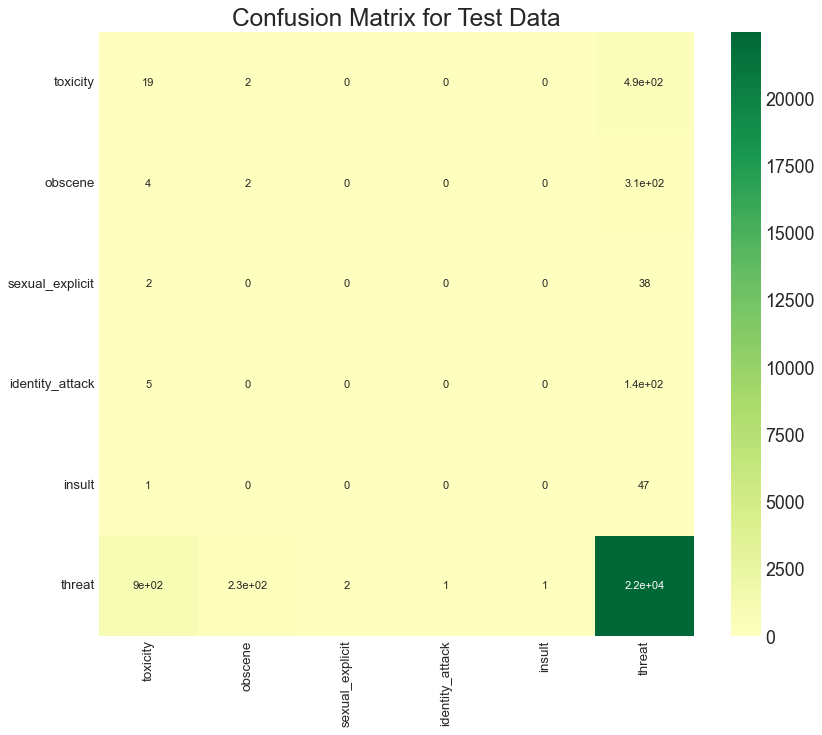

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(cm, xticklabels=classInputs, yticklabels=classInputs, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Confusion Matrix for Test Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

as we can see, accuracy can be achieved even more as per the confusion matrix.